# Deep Learning for Time Series Forecasting: 7-Day Crash Course
## Lesson 4 Exercise: CNN for Time Series Forecasting
This workbook constructs, trains, and tests a CNN model using the daily-total-female-births dataset listed in the course materials. This workbook reads in processed data from the Lesson 2 workbook in this same repository and produces accuracy and loss plots for the trained model. Attributions for additional libraries are found at the end.

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import itertools
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
import keras
from livelossplot import PlotLossesKeras
from keras.layers.convolutional import Conv1D, MaxPooling1D

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import Data

In [2]:
inputs = pd.read_csv('inputs.csv')
outputs = pd.read_csv('outputs.csv')

### Reshape from [samples, timesteps] to [samples, timesteps, features]

In [3]:
inputs = inputs.as_matrix()
X = inputs.reshape((inputs.shape[0], inputs.shape[1], 1))
print(X.shape)

(361, 3, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## Model

### Define Model

In [21]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200))
model.add(Dropout(0.3))
model.add(Dense(400))
model.add(Dense(1))

### Define Hyper parameters and optimization function

In [22]:
epochs = 100
learning_rate = 0.001
opt_function = optimizers.Adam(lr=learning_rate)
model.compile(optimizer=opt_function, loss='mse', metrics=['accuracy'])

### Train model

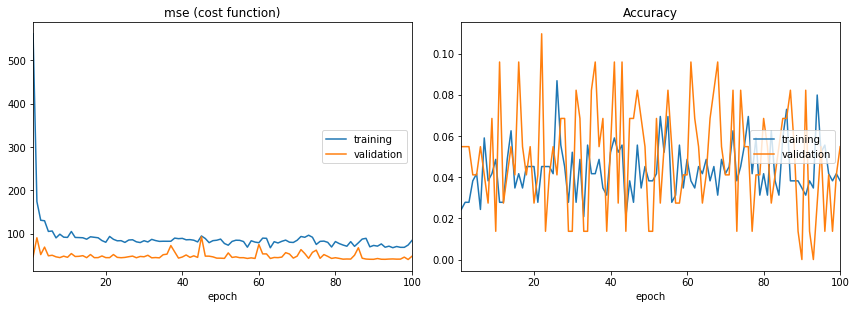

Model trained


In [23]:
trained_model = model.fit(X, outputs, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[PlotLossesKeras()])
print('Model trained')

### Evaluate Model

In [24]:
score = model.evaluate(X, outputs, batch_size=12)

361/361 [==============================] - 0s 107us/step


### Test prediction accuracy
Sample input data is [50,60,70] and the expected prediction value is 80.

In [25]:
pred_input = np.array([50, 60, 70])
Xpred = pred_input.reshape((1,3,1))
pred_output = model.predict(Xpred, verbose=1)
print("Predicted output:", pred_output)

1/1 [==============================] - 0s 48ms/step
Predicted output: [[53.466816]]


In [28]:
error = 80 - pred_output[0]
percent_error = (error/80)*100
print('Percent Error:', percent_error)

Percent Error: [33.16648]
